In [16]:
import numpy as np
import pandas as pd

N = 1_000
Xy = pd.DataFrame({'X': np.random.normal(0, 1, N)}) \
    .assign(N=np.random.normal(size=N)) \
    .assign(Y=lambda df: np.random.normal(df['X']**3, 1))

Xy.shape

(1000, 3)

<Axes: xlabel='X', ylabel='Y'>

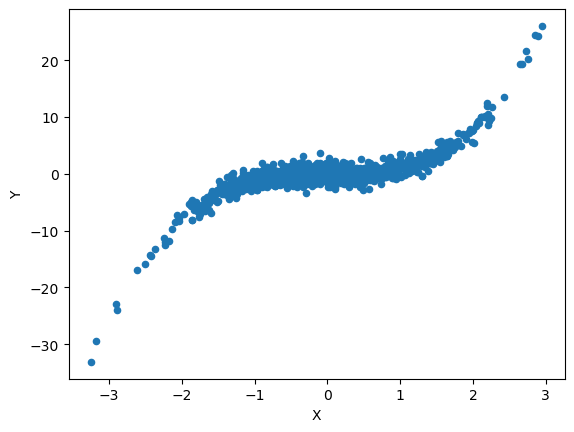

In [30]:
Xy.plot(kind='scatter', x='X', y='Y')

In [31]:
from sklearn.ensemble import RandomForestRegressor

f_Y = RandomForestRegressor(n_jobs=-1, random_state=37).fit(Xy[['X']], Xy['Y'])
f_X = RandomForestRegressor(n_jobs=-1, random_state=37).fit(Xy[['Y']], Xy['X'])

r_Y = pd.DataFrame({'y_true': Xy['Y'], 'y_pred': f_Y.predict(Xy[['X']])}) \
    .assign(r=lambda d: d['y_true'] - d['y_pred'])
r_X = pd.DataFrame({'x_true': Xy['X'], 'x_pred': f_X.predict(Xy[['Y']])}) \
    .assign(r=lambda d: d['x_true'] - d['x_pred'])

In [32]:
r_Y.r.mean(), r_X.r.mean()

(-0.0026465400674962284, 0.004895485990347327)

In [38]:
r_Y[['y_true', 'r']].corr(method='spearman')

,y_true,r
y_true,1.000000,0.434862
r,0.434862,1.000000


In [39]:
r_X[['x_true', 'r']].corr(method='spearman')

,x_true,r
x_true,1.000000,0.542552
r,0.542552,1.000000


In [40]:
from castle.common.independence_tests import hsic_test

hsic_test(r_Y['y_true'].values.reshape(-1, 1), r_Y['r'].values.reshape(-1, 1), alpha=0.1)

0

In [41]:
hsic_test(r_X['x_true'].values.reshape(-1, 1), r_X['r'].values.reshape(-1, 1), alpha=0.1)

0

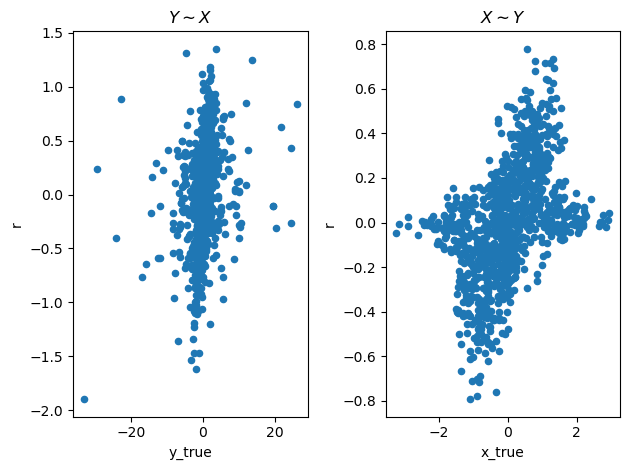

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

r_Y.plot(kind='scatter', x='y_true', y='r', title=r'$Y \sim X$', ax=ax[0])
r_X.plot(kind='scatter', x='x_true', y='r', title=r'$X \sim Y$', ax=ax[1])

fig.tight_layout()